<h1 style = 'color: green'>EDA Case Study:- Lending Club Case</h1>

<b>Group Members: Raj Kansara, Mahes</b>

#### Importing All Required Libraries

In [330]:
import warnings
warnings.filterwarnings('ignore')

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# A. Understanding the Data Set:

### Loading the 'Application_data' dataset:

In [332]:
loandata = pd.read_csv('loan.csv')

#Look into the dataset
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.000,60 months,12.69%,67.790,B,B5,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN


In [333]:
#Checking the dimensions of the dataset

loandata.shape

(39717, 111)

In [334]:
#Detail Info about the data

loandata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [335]:
#Getting to know Numeric Data in dataset

loandata.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,...,0.000,0.000,0.000,0.000,39020.000,39678.000,0.000,0.000,0.000,0.000
mean,683131.913,850463.559,11219.444,10947.713,10397.449,324.562,68968.926,13.315,0.147,0.869,...,NaN,NaN,NaN,NaN,0.043,0.000,NaN,NaN,NaN,NaN
std,210694.133,265678.307,7456.671,7187.239,7128.450,208.875,63793.766,6.679,0.492,1.070,...,NaN,NaN,NaN,NaN,0.204,0.000,NaN,NaN,NaN,NaN
min,54734.000,70699.000,500.000,500.000,0.000,15.690,4000.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
25%,516221.000,666780.000,5500.000,5400.000,5000.000,167.020,40404.000,8.170,0.000,0.000,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
50%,665665.000,850812.000,10000.000,9600.000,8975.000,280.220,59000.000,13.400,0.000,1.000,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
75%,837755.000,1047339.000,15000.000,15000.000,14400.000,430.780,82300.000,18.600,0.000,1.000,...,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
max,1077501.000,1314167.000,35000.000,35000.000,35000.000,1305.190,6000000.000,29.990,11.000,8.000,...,NaN,NaN,NaN,NaN,2.000,0.000,NaN,NaN,NaN,NaN


In [336]:
#Checking null rows
print("Number of empty rows:", loandata.isna().all(axis=1).sum())

#Getting null values coloumn wise
loandata.isna().sum()

Number of empty rows: 0


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# B. Preparing the Data & Standardizing Values

### Checking the Missing Values in Application Dataset

In [337]:
loandata.isna().sum()[loandata.isna().sum()>0].count()

68

In [338]:
# Finding the 'Missing Value Percentage' for each column:

missing_values_percentage = (loandata.isna().sum() / loandata.shape[0])*100
missing_values_percentage

id                             0.000
member_id                      0.000
loan_amnt                      0.000
funded_amnt                    0.000
funded_amnt_inv                0.000
                               ...  
tax_liens                      0.098
tot_hi_cred_lim              100.000
total_bal_ex_mort            100.000
total_bc_limit               100.000
total_il_high_credit_limit   100.000
Length: 111, dtype: float64

### For some Columns, since more than 50% missing records is a significant number, It will be best to drop these columns.

In [339]:
# Making the list of columns which has more than 50% of missing values. We will drop this coulmns as data is inadeqaute

drop_list = missing_values_percentage[missing_values_percentage>=50]
drop_list.index

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [340]:
new_loan_data = loandata.drop(columns=drop_list.index)

In [342]:
# Drop additional columns we don't need these as these are mostly nulls.

drop_list1 = ["desc","member_id","url","emp_title","zip_code","tax_liens", "acc_now_delinq", "chargeoff_within_12_mths",'application_type','policy_code','initial_list_status','installment','pymnt_plan', "delinq_amnt","collections_12_mths_ex_med"]
new_loan_data.drop(labels = drop_list1, axis=1, inplace=True)

### We will be using new_loan_data for further analysis

In [343]:
new_loan_data.shape

(39717, 39)

In [344]:
new_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

### Checking if there are any duplicates present in the dataset.

In [345]:
#Checking Duplicates in the dataset by id
new_loan_data[new_loan_data.duplicated(['id'])]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


### Note:-
As observed, there no duplicates present.

### Checking column with low or less significant missing values

In [346]:
# Finding the columns where the Percentage of the Missing Values is Low or Less Significant
(new_loan_data.isnull().sum()[new_loan_data.isnull().sum()>0] / new_loan_data.shape[0])*100

emp_length             2.707
title                  0.028
revol_util             0.126
last_pymnt_d           0.179
last_credit_pull_d     0.005
pub_rec_bankruptcies   1.755
dtype: float64

### These columns have a varied percentage of missing values hence we will handle each one differently

### 1) emp_length

In [347]:
new_loan_data.emp_length.value_counts(normalize=True)

10+ years   0.230
< 1 year    0.119
2 years     0.114
3 years     0.106
4 years     0.089
5 years     0.085
1 year      0.084
6 years     0.058
7 years     0.046
8 years     0.038
9 years     0.033
Name: emp_length, dtype: float64

In [348]:
new_loan_data.emp_length[new_loan_data.emp_length.isna() == True]

168      NaN
323      NaN
394      NaN
422      NaN
439      NaN
        ... 
32591    NaN
32608    NaN
32621    NaN
32631    NaN
32665    NaN
Name: emp_length, Length: 1075, dtype: object

### emp_length contains NA values so will replace it with '0'

In [349]:
new_loan_data.emp_length.fillna('0', inplace=True)

# We will convert these columns to numeric so that we can use it in further analysis and finding correlation
new_loan_data['emp_length']=new_loan_data.emp_length.str.extract('(\d+)')
new_loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.000,36 months,10.65%,B,B2,10,RENT,...,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,May-16,0.000
1,1077430,2500,2500,2500.000,60 months,15.27%,C,C4,1,RENT,...,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,Sep-13,0.000
2,1077175,2400,2400,2400.000,36 months,15.96%,C,C5,10,RENT,...,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,May-16,0.000
3,1076863,10000,10000,10000.000,36 months,13.49%,C,C1,10,RENT,...,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,Apr-16,0.000
4,1075358,3000,3000,3000.000,60 months,12.69%,B,B5,1,RENT,...,3513.330,2475.940,1037.390,0.000,0.000,0.000,May-16,67.790,May-16,0.000


### 2) pub_rec_bankruptcies

In [350]:
new_loan_data.pub_rec_bankruptcies.value_counts(normalize=True)

0.000   0.957
1.000   0.043
2.000   0.000
Name: pub_rec_bankruptcies, dtype: float64

In [351]:
new_loan_data.pub_rec_bankruptcies[new_loan_data.pub_rec_bankruptcies.isna() == True]

35006   NaN
35058   NaN
35362   NaN
38443   NaN
38717   NaN
         ..
39712   NaN
39713   NaN
39714   NaN
39715   NaN
39716   NaN
Name: pub_rec_bankruptcies, Length: 697, dtype: float64

### Here will replace this Na values with 'Not Known'

In [352]:
new_loan_data.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
#print(new_loan_data.pub_rec_bankruptcies.isnull().sum())

### We need to convert some columns to numeric before imputation/Analysis

In [353]:
new_loan_data['revol_util'] = new_loan_data['revol_util'].str.rstrip('%')
new_loan_data['int_rate'] = new_loan_data['int_rate'].str.rstrip('%')

#Converting all number string columns to numeric
num_str_col = ['revol_util','int_rate','loan_amnt','funded_amnt','funded_amnt_inv','annual_inc','dti','emp_length','total_pymnt']
new_loan_data[num_str_col] = new_loan_data[num_str_col].apply(pd.to_numeric)
new_loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.000,36 months,10.650,B,B2,10,RENT,...,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,May-16,0.000
1,1077430,2500,2500,2500.000,60 months,15.270,C,C4,1,RENT,...,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,Sep-13,0.000
2,1077175,2400,2400,2400.000,36 months,15.960,C,C5,10,RENT,...,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,May-16,0.000
3,1076863,10000,10000,10000.000,36 months,13.490,C,C1,10,RENT,...,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,Apr-16,0.000
4,1075358,3000,3000,3000.000,60 months,12.690,B,B5,1,RENT,...,3513.330,2475.940,1037.390,0.000,0.000,0.000,May-16,67.790,May-16,0.000


### 3) revol_util

In [354]:
new_loan_data.revol_util.describe()

count   39667.000
mean       48.832
std        28.333
min         0.000
25%        25.400
50%        49.300
75%        72.400
max        99.900
Name: revol_util, dtype: float64

we can replace NAN values with median values as replcaing with max and min would max difference.

### 4) last_pymnt_d

In [355]:
new_loan_data.last_pymnt_d.value_counts(normalize=True)

May-16   0.032
Mar-13   0.026
Dec-14   0.024
May-13   0.023
Feb-13   0.022
          ... 
Nov-08   0.000
Jun-08   0.000
Mar-08   0.000
Jan-08   0.000
Feb-08   0.000
Name: last_pymnt_d, Length: 101, dtype: float64

Here replacing NAN values will not make sense, as there might be data where customer has not taken any loans yet, there would no date for last month payment

# C. Dealing with outliers

In [356]:
new_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               39717 non-null  int64  
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [357]:
new_loan_data.loan_amnt.describe()

count   39717.000
mean    11219.444
std      7456.671
min       500.000
25%      5500.000
50%     10000.000
75%     15000.000
max     35000.000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

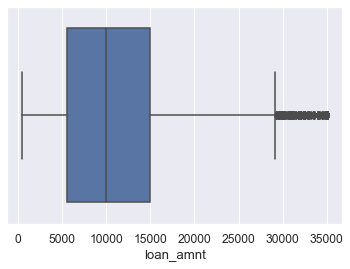

In [358]:
sns.boxplot(new_loan_data.loan_amnt)

In [359]:
new_loan_data.int_rate.describe()

count   39717.000
mean       12.021
std         3.725
min         5.420
25%         9.250
50%        11.860
75%        14.590
max        24.590
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

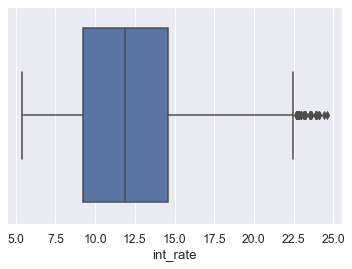

In [360]:
sns.boxplot(new_loan_data.int_rate)

In [361]:
pd.set_option('display.float_format', '{:.3f}'.format)
new_loan_data.annual_inc.describe()

count     39717.000
mean      68968.926
std       63793.766
min        4000.000
25%       40404.000
50%       59000.000
75%       82300.000
max     6000000.000
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

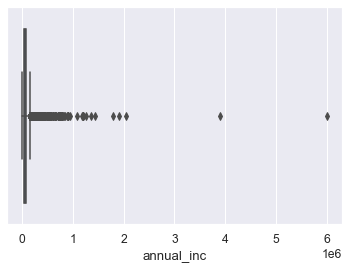

In [362]:
sns.boxplot(new_loan_data.annual_inc)

#### As it can be seen from the above box plot that there are outliers. Best way to deal here is to remove the outlier

In [363]:
new_loan_data['annual_inc'].quantile(0.95)

142000.0

In [364]:
new_loan_data[new_loan_data['annual_inc'] > new_loan_data['annual_inc'].quantile(0.99)]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
392,1064548,5000,5000,5000.000,36 months,6.620,A,A2,1,RENT,...,5526.660,5000.000,526.660,0.000,0.000,0.000,Jan-15,166.040,Dec-14,0.000
717,1060831,28000,28000,28000.000,36 months,15.960,C,C5,5,MORTGAGE,...,34735.370,28000.000,6735.370,0.000,0.000,0.000,Feb-14,10164.770,Mar-14,0.000
836,1059319,35000,22875,22875.000,60 months,19.030,E,E2,4,MORTGAGE,...,19075.970,6337.110,7318.780,0.000,5420.080,921.414,Dec-13,31.280,May-16,0.000
1210,1054185,12000,12000,12000.000,36 months,6.030,A,A1,6,MORTGAGE,...,13148.140,12000.000,1148.140,0.000,0.000,0.000,Dec-14,369.480,Dec-14,0.000
1348,1049941,35000,35000,35000.000,36 months,7.900,A,A4,1,MORTGAGE,...,39418.800,35000.000,4418.800,0.000,0.000,0.000,Nov-14,2188.940,Nov-14,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39438,198952,2500,2500,550.000,36 months,7.430,A,A2,10,MORTGAGE,...,566.180,2500.000,73.530,0.000,0.000,0.000,Jun-08,2263.150,Aug-08,Not Known
39554,157169,25000,25000,499.999,36 months,9.010,B,B2,10,MORTGAGE,...,206.150,8260.950,2100.380,0.000,0.000,0.000,Dec-08,821.250,May-16,Not Known
39578,148473,10000,10000,1825.005,36 months,9.010,B,B2,1,MORTGAGE,...,817.920,3239.250,893.700,47.690,304.180,3.090,Jul-09,500.110,Jan-11,Not Known
39611,137042,25000,5650,725.000,36 months,14.380,E,E4,2,MORTGAGE,...,896.860,5650.000,1339.310,0.000,0.000,0.000,Oct-10,203.820,Oct-10,Not Known


So will remove data higher than 99 percentile as the data is less and it would affect the analysis 

In [444]:
new_loan_data = new_loan_data[new_loan_data['annual_inc'] < new_loan_data['annual_inc'].quantile(0.99)]
new_loan_data['annual_inc'].describe()

count    38924.000
mean     64096.803
std      32378.165
min       4000.000
25%      40000.000
50%      58000.000
75%      80000.000
max     188004.000
Name: annual_inc, dtype: float64

In [635]:
#We will also do binning for bivariate analysis
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000+']
new_loan_data['loan_amnt_bin'] = pd.cut(new_loan_data['loan_amnt'], bins=bins, labels=labels)

bins = [0, 20000, 40000, 60000, 80000, 100000]
labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +']
new_loan_data['annual_inc_bin'] = pd.cut(new_loan_data['annual_inc'], bins=bins, labels=labels)

In [636]:
new_loan_data.total_pymnt.describe()

count   38924.000
mean    11964.405
std      8860.880
min         0.000
25%      5543.279
50%      9758.495
75%     16296.532
max     58563.680
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='total_pymnt'>

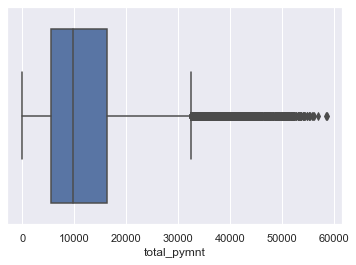

In [637]:
sns.boxplot(new_loan_data.total_pymnt)

In [638]:
new_loan_data.last_pymnt_amnt.describe()

count   38924.000
mean     2627.103
std      4361.007
min         0.000
25%       216.285
50%       536.280
75%      3235.245
max     36115.200
Name: last_pymnt_amnt, dtype: float64

<AxesSubplot:xlabel='last_pymnt_amnt'>

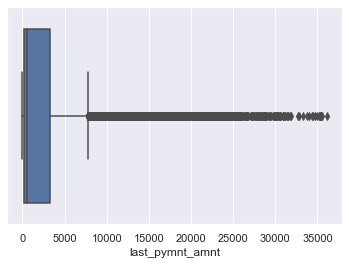

In [639]:
sns.boxplot(new_loan_data.last_pymnt_amnt)

As this column is not that much useful we won't do any outlier removal.

### Derived Columns:- 

##### Spliting Date column in month and year column for last_pymnt_d and issue_d. As other dates are for credit line and pull are not requireed

In [640]:
new_loan_data.last_pymnt_d = pd.to_datetime(new_loan_data.last_pymnt_d, format='%b-%y')
new_loan_data['last_pymnt_year'] = new_loan_data.last_pymnt_d.dt.year
new_loan_data['last_pymnt_month'] = new_loan_data.last_pymnt_d.dt.month

In [641]:
new_loan_data.issue_d = pd.to_datetime(new_loan_data.issue_d, format='%b-%y')
new_loan_data['issue_year'] = new_loan_data.issue_d.dt.year
new_loan_data['issue_month'] = new_loan_data.issue_d.dt.month

# Main Analysis of new_loan_data DataFrame:-

### In loan status, Charged-off are defaulters and others are non-defaulters 

In [642]:
# Checking how the data in loan_status column in divided:
new_loan_data.loan_status.value_counts(normalize=True)

Fully Paid    0.829
Charged Off   0.143
Current       0.029
Name: loan_status, dtype: float64

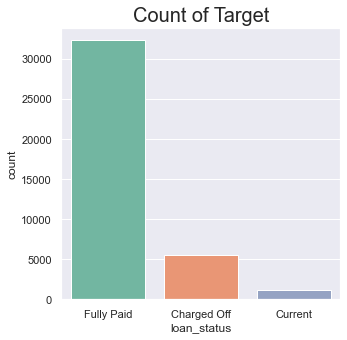

In [643]:
# Count Plot of loan_status Variable

fig= plt.figure(figsize=(5,5))
Target= sns.countplot(x='loan_status', data= new_loan_data, palette= 'Set2')
Target.set_title('Count of Target',fontsize=20)
plt.show()

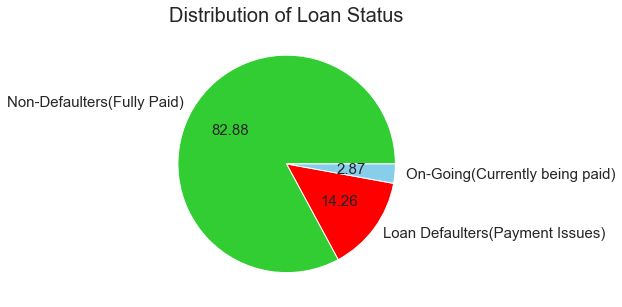

In [644]:
# Pie Chart of Target Variable

fig= plt.figure(figsize=(5,5))
colors= ('limegreen', 'Red', 'SKYBlue')
Dist_of_Target = plt.pie(x=new_loan_data.loan_status.value_counts(normalize=True), colors= colors, autopct='%.2f', labels=['Non-Defaulters(Fully Paid)','Loan Defaulters(Payment Issues)','On-Going(Currently being paid)'], textprops={'fontsize':15}) 
plt.title('Distribution of Loan Status',fontsize=20)
plt.show()

### Note:

Here, it is clear that almost 83% (83.10%) of the people are loan repayers or people who do not have payment issues whereas almost 14.12% people are loan defaulters or people who face payment difficulties.

In [832]:
def countplots(l,title,xlabel,hue='loan_status',rows=1,cols=1,num=1):
    
    # Subplot 1 : Countplot 
    plt.subplot(rows,cols,num)
    count_plot = sns.countplot(data = new_loan_data , hue = hue, x=l, palette='Set2')
    count_plot.set_title(title,fontsize=20)
    count_plot.set_xlabel(xlabel,fontsize=15)
    count_plot.set_ylabel('Loan Application Count',fontsize=15)
    plt.setp(count_plot.xaxis.get_majorticklabels(),rotation=45,fontsize=13)
    plt.setp(count_plot.yaxis.get_majorticklabels(),fontsize=13)
    return None

def distplots(var,title,xlabel):
    plt.figure(figsize=(20,20))
    plt.subplots_adjust(hspace = .5, wspace=.2)
    plt.subplot(2,2,1)
    sns.distplot(new_loan_data[var],label=title)
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel('Loan Application Count',fontsize=14)
    plt.title(title,fontsize=20)
    plt.subplot(2,2,3)
    sns.distplot(nondefaulters[var],label=title + ' Non Defaulters')
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel('Loan Application Count',fontsize=14)
    plt.title(title + ' (Non Defaulters)',fontsize=20)
    plt.subplot(2,2,4)
    sns.distplot(defaulter[var],label=title + ' Defaulters')
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel('Loan Application Count',fontsize=14)
    plt.title(title + ' (Defaulters)',fontsize=20)
    plt.subplot(2,2,2)
    loanamt_status = sns.boxplot(y=var, x='loan_status', data=new_loan_data)
    loanamt_status.set_title(title,fontsize=20)
    loanamt_status.set_xlabel('Loan Status',fontsize=14)
    loanamt_status.set_ylabel(title,fontsize=14)
    plt.show()
    return None

def barplots(var,title,xlabel,data,yvar='Defaulter_Percentage',ylabel='Defaulter Percentage'):
    varvsloanstatus = sns.barplot(x=var,y=yvar,data=data,palette='Set2')
    varvsloanstatus.set_title(title,fontsize=20)
    varvsloanstatus.set_xlabel(xlabel,fontsize=16)
    varvsloanstatus.set_ylabel(ylabel,fontsize=16) 
    plt.setp(varvsloanstatus.xaxis.get_majorticklabels(),rotation=45)
    plt.show()
    return None
    

# Univariate & Segmented Univariate Analysis

### 1.1 Categorical Ordered Variables:

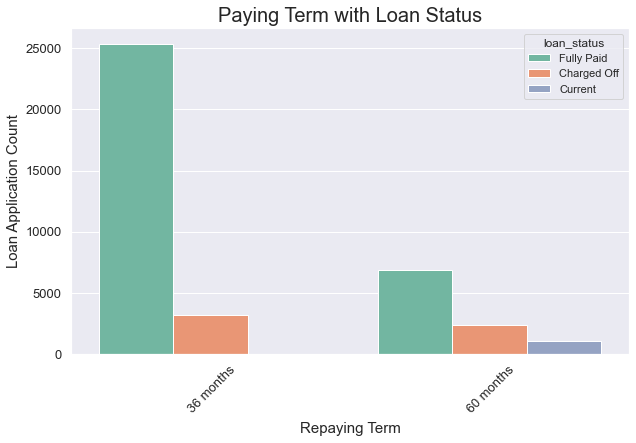

In [833]:
plt.figure(figsize=(10,6))
countplots('term', 'Paying Term with Loan Status','Repaying Term')

Note:-
Above plot shows that applicant having loan term of 60 months are more likely to default than 36 months (Relatively between Fully Paid & Charged Off)

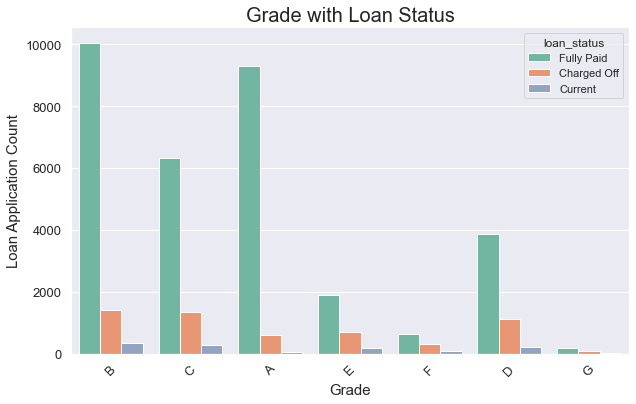

In [834]:
plt.figure(figsize=(10,6))
countplots('grade', 'Grade with Loan Status', 'Grade')

Note:- Loan having higher grade are more likely to default then lower grade (Relatively)

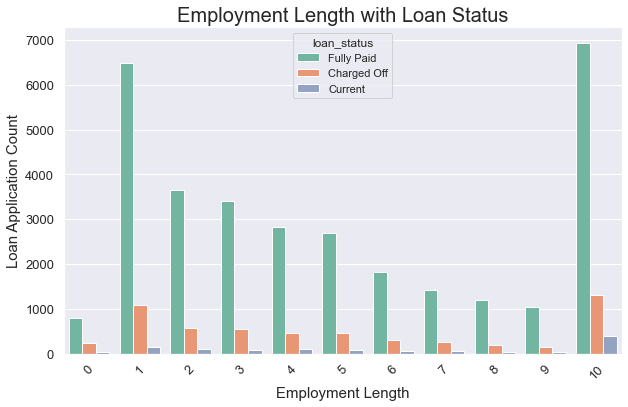

In [835]:
plt.figure(figsize=(10,6))
countplots('emp_length', 'Employment Length with Loan Status', 'Employment Length')

Note:- 
Above plot shows that no. of applicants that take loan are mainly having employment length of 1 year or 10 year. So chances of applicant becoming a defaulter are also high of people having 1 or 10 yearss of employment 

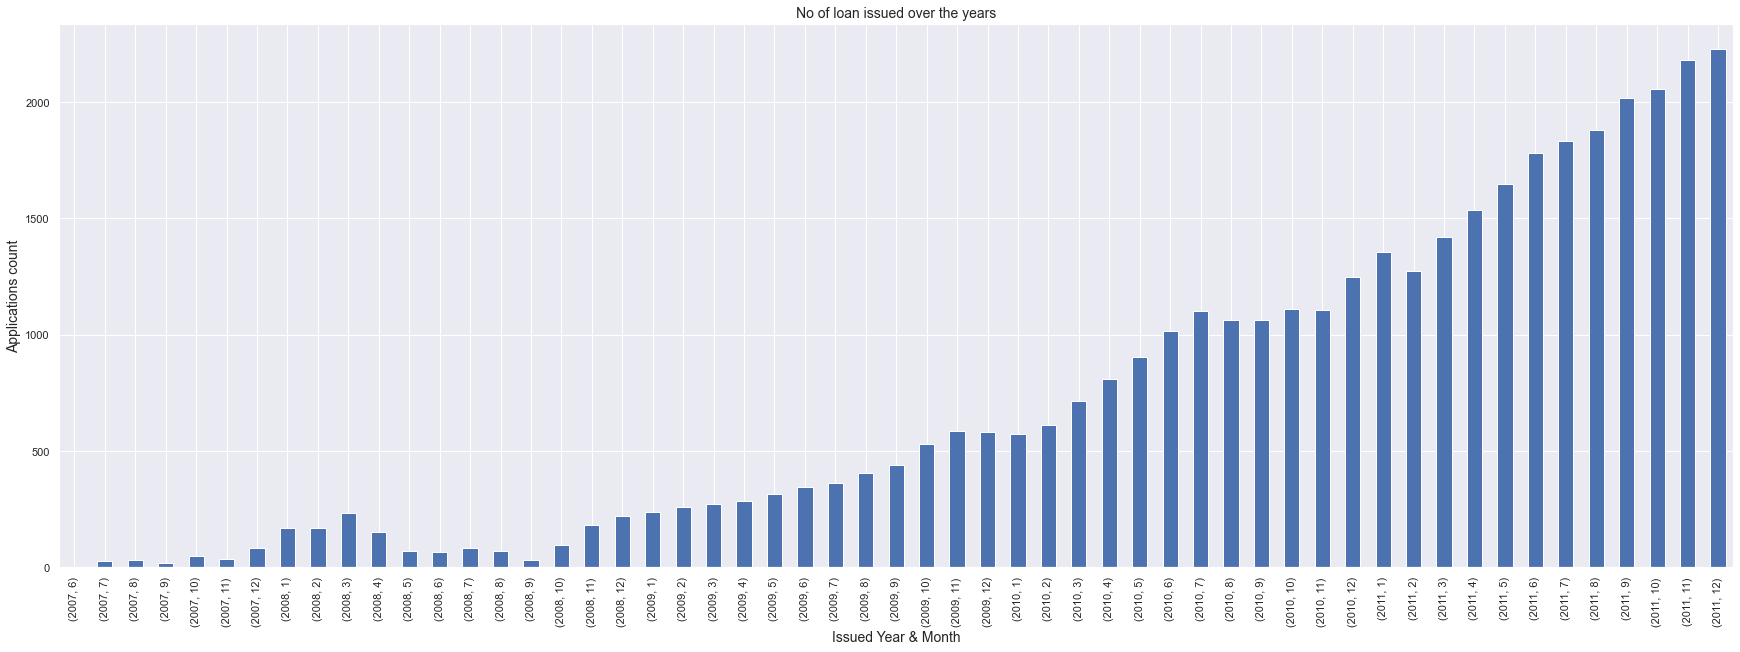

In [836]:
plt.figure(figsize=(30,10))
new_loan_data.groupby(['issue_year','issue_month']).id.count().plot(kind='bar')
plt.ylabel('Applications count',fontsize=14)
plt.xlabel('Issued Year & Month',fontsize=14)      
plt.title("No of loan issued over the years",fontsize=14)
plt.show()

Note:- 
As observed from the above graph, with each passing year, no. of loan applicants are increasing and so increase in no. of applicants will add more to defaulters.

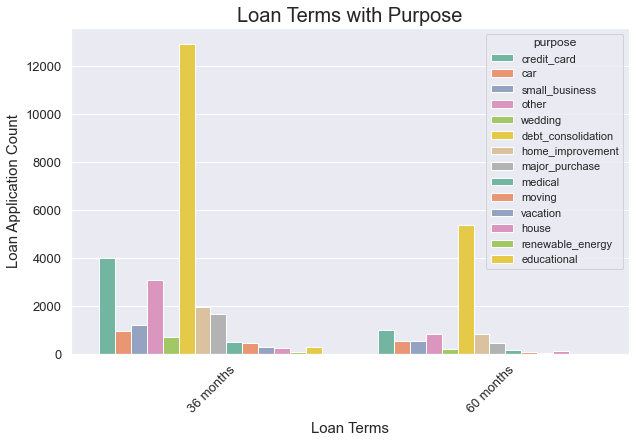

In [837]:
plt.figure(figsize=(10,6))
countplots('term', 'Loan Terms with Purpose', 'Loan Terms', hue='purpose')

Note:-
As observed from the above graph, people taking loan for debt consolidation are more compare to others. Second comes credit card.
<br/><br/>
Also people taking loan with 36 month term are more compared to loan with 60 months term

### 1.2 Categorical Unordered Variables

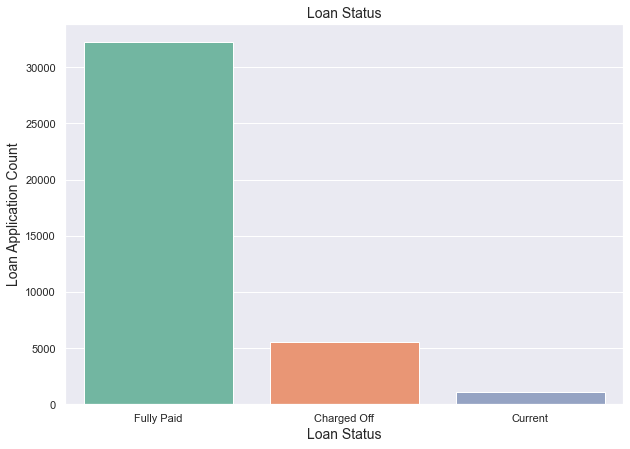

In [838]:
plt.figure(figsize=(10,7))
loanstatus = sns.countplot(x="loan_status",data=new_loan_data, palette='Set2')
loanstatus.set_title('Loan Status',fontsize=14)
loanstatus.set_xlabel('Loan Status',fontsize=14)
loanstatus.set_ylabel('Loan Application Count',fontsize=14)
plt.show()

Note:- 
As observed, Most of applicants have fully pay off the loans.

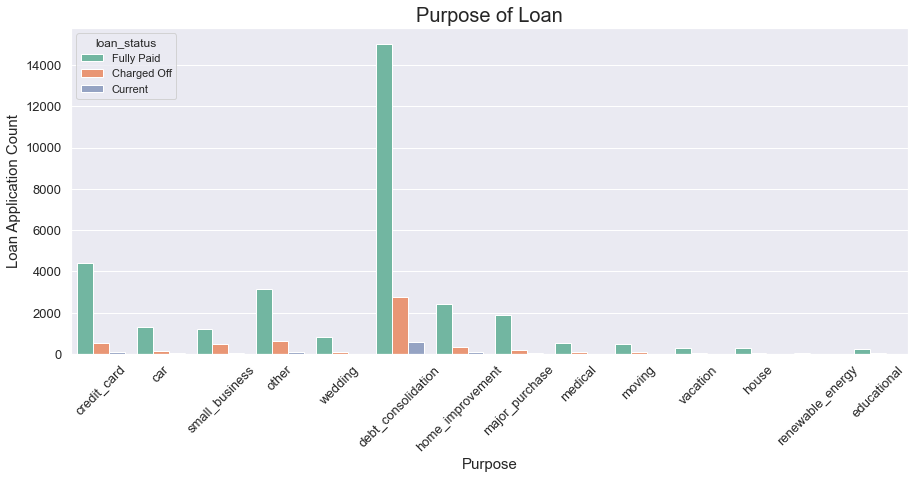

In [839]:
plt.figure(figsize=(15,6))
countplots('purpose', 'Purpose of Loan', 'Purpose')

Note:- 
Above plot shows that there are more number of defaulters overall who have taken loan for debt consolidation. Followed by applicants who have applied loan for other reason

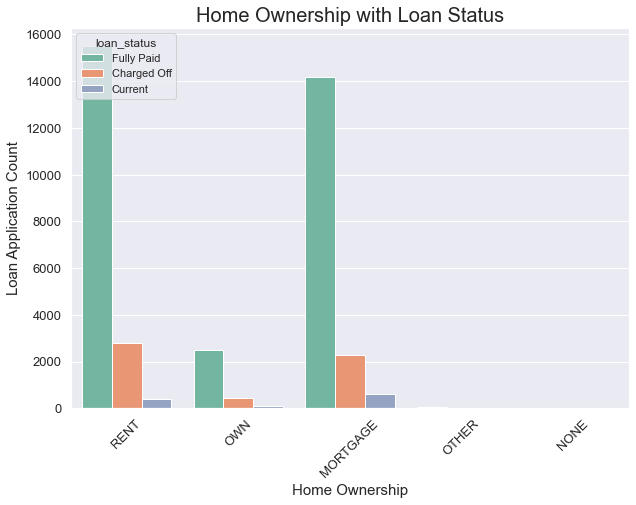

In [840]:
plt.figure(figsize=(10,7))
countplots('home_ownership', 'Home Ownership with Loan Status', 'Home Ownership')

Note:- 
People who are living on rent and mortgage are more likely to become defauters

### 1.3 Numerical Variables

In [841]:
nondefaulters = new_loan_data[new_loan_data['loan_status']!='Charged Off']
defaulter = new_loan_data[new_loan_data['loan_status']=='Charged Off']

In [842]:
nondefaulters['loan_status'].value_counts(normalize=True)

Fully Paid   0.967
Current      0.033
Name: loan_status, dtype: float64

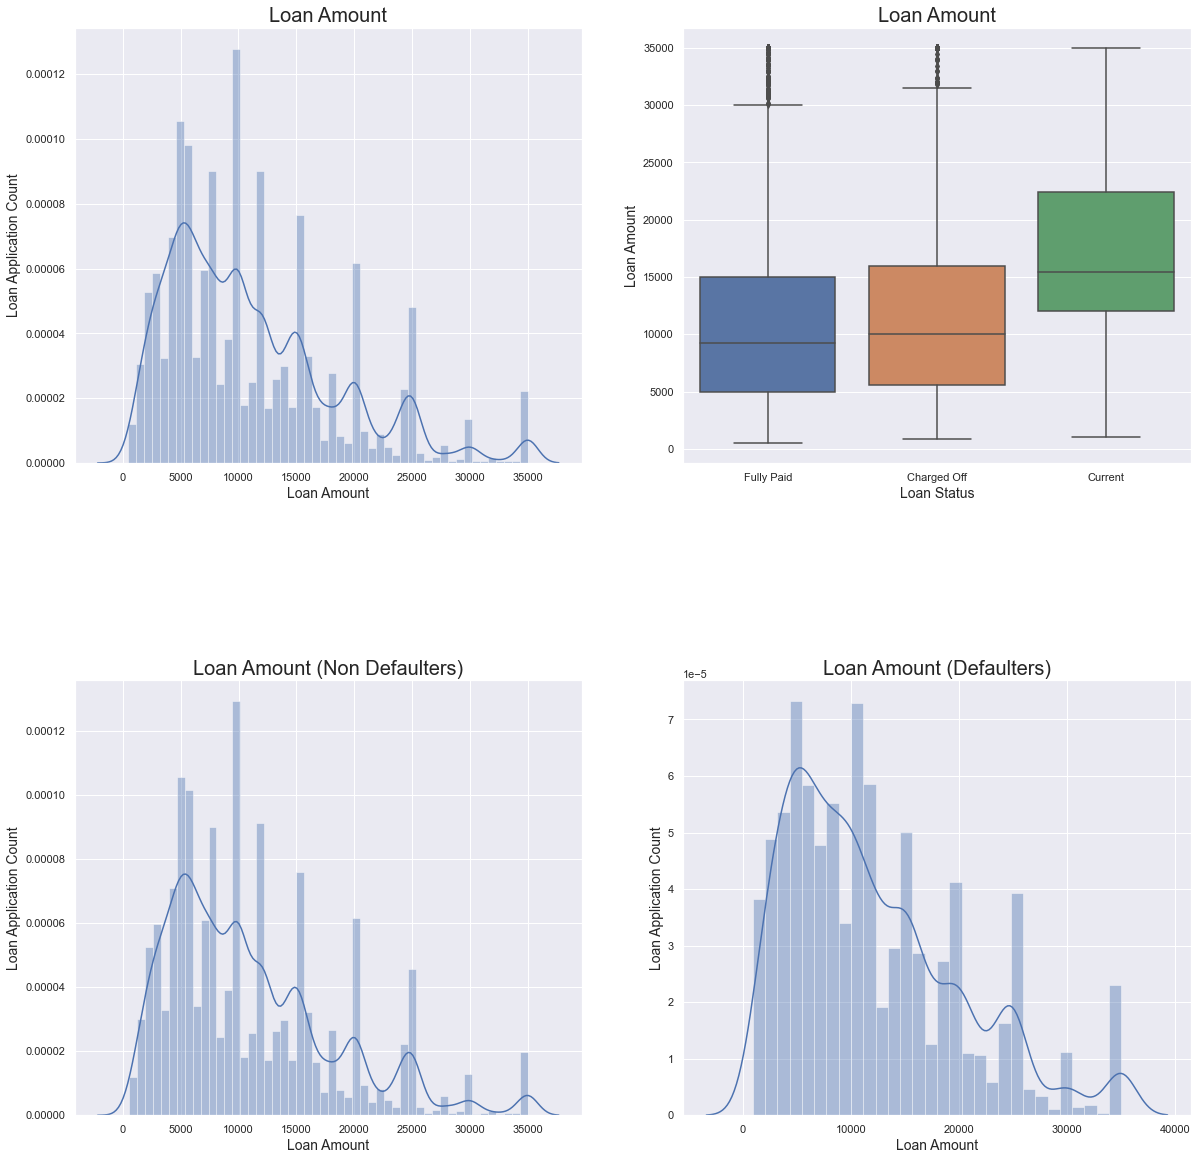

In [843]:
distplots('loan_amnt', 'Loan Amount', 'Loan Amount')

Note:- 
Above plots shows that most of loan amounts are in range 5000-15000.
Also there is no significant difference in loan amounts for people who become defaulters and people who pay off thier loans

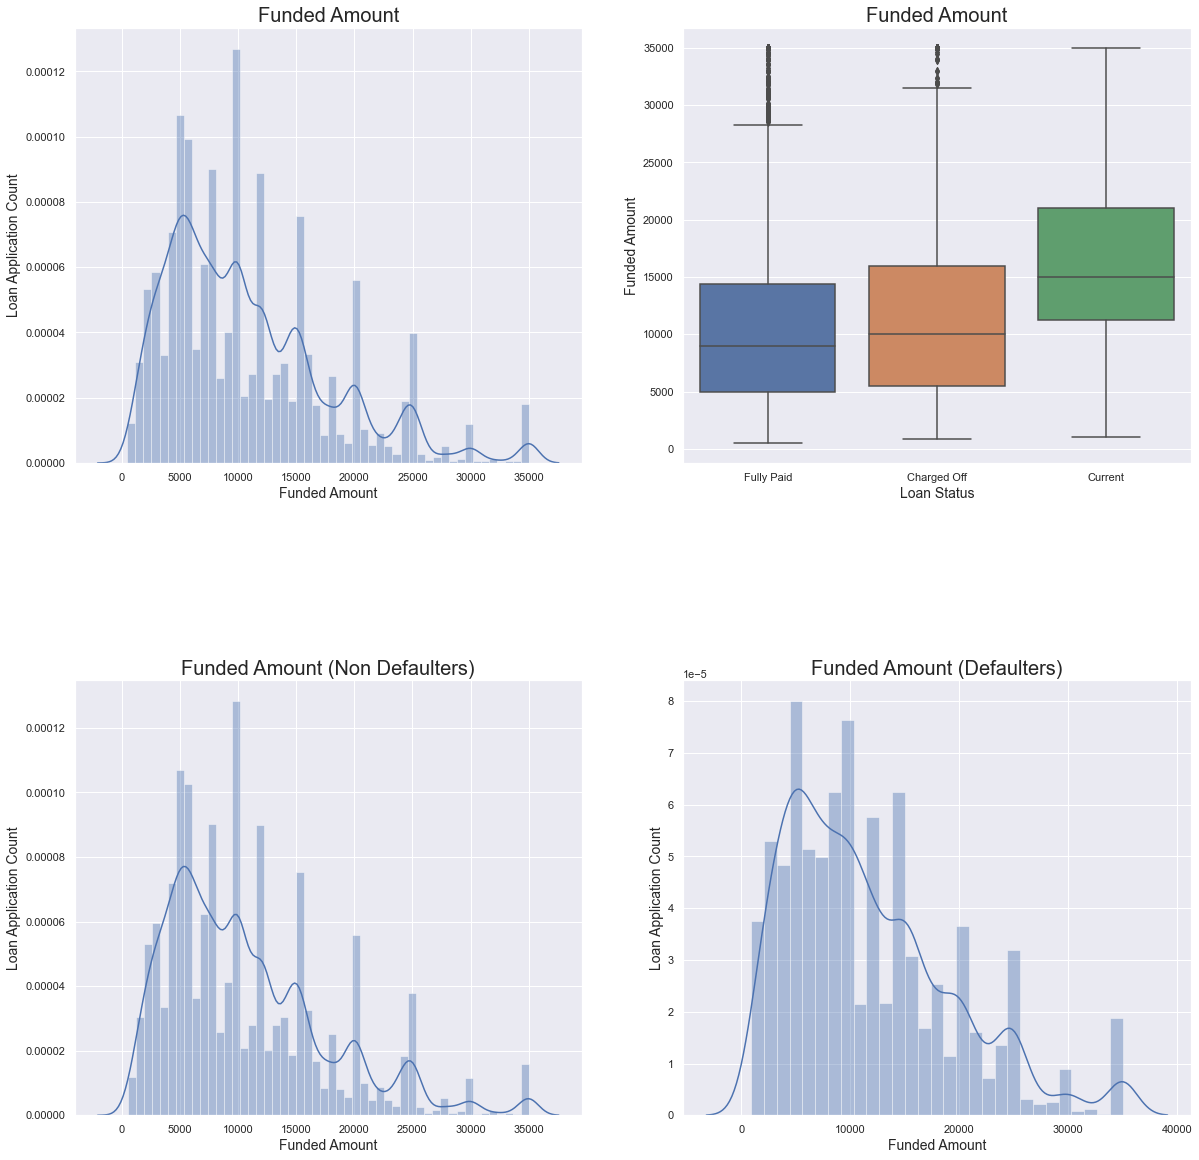

In [844]:
distplots('funded_amnt', 'Funded Amount', 'Funded Amount')

Note:- 
Above plots shows similar analysis as loan amount plot. Henceforth we will be using loan amount only.

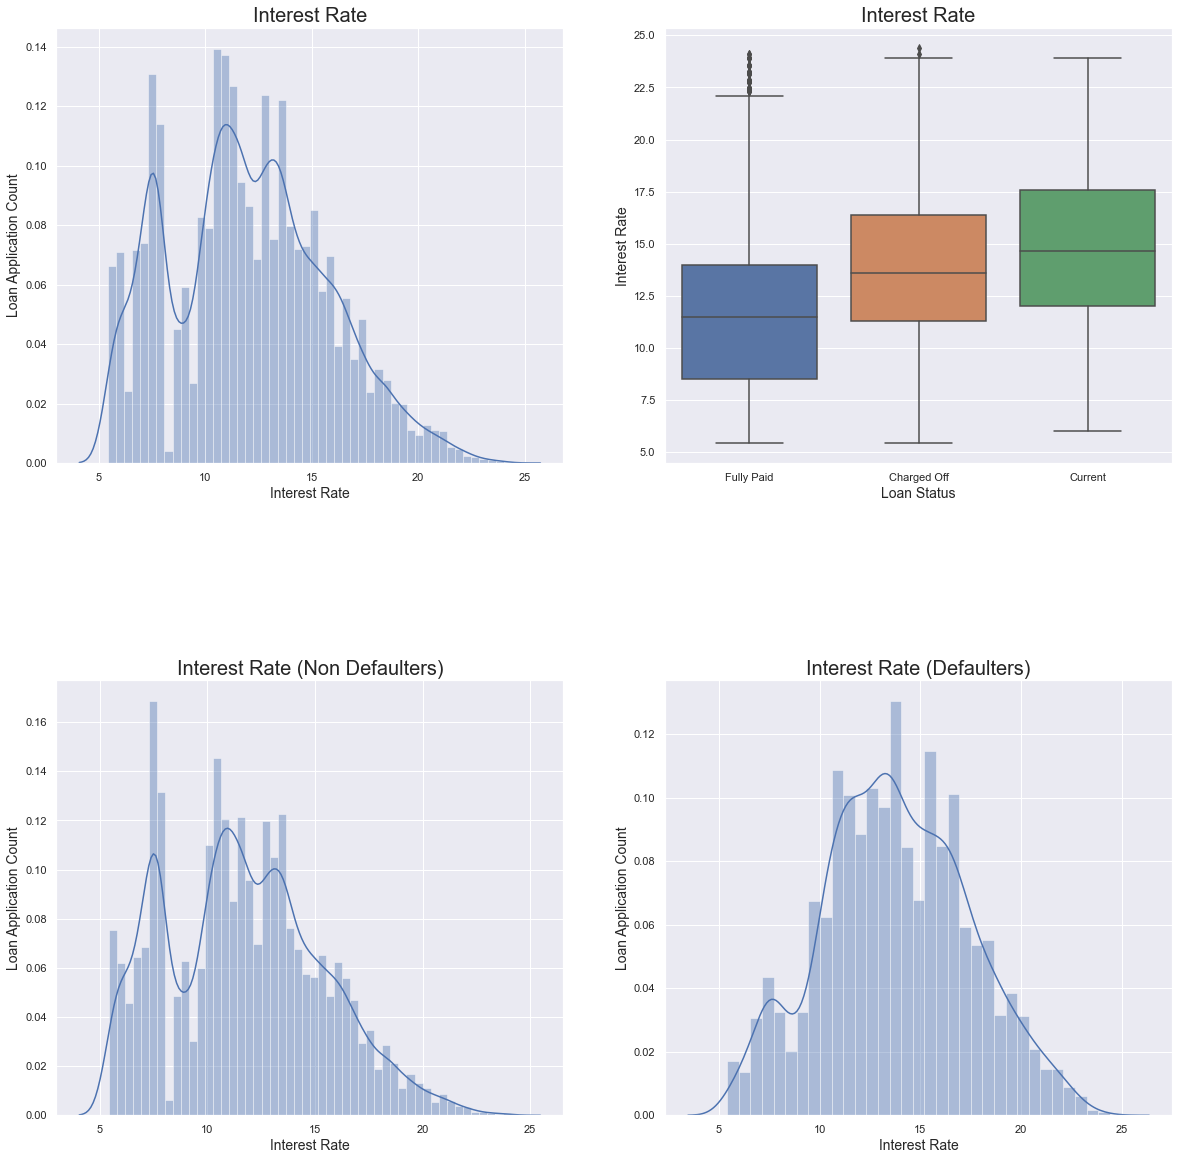

In [845]:
distplots('int_rate', 'Interest Rate', 'Interest Rate')

Note:-
Most of the interest rates are in between 10% to 15%.
Above plot shows that people pay off loans which has low interest rate. We will see more detail analysis in bivariate analysis

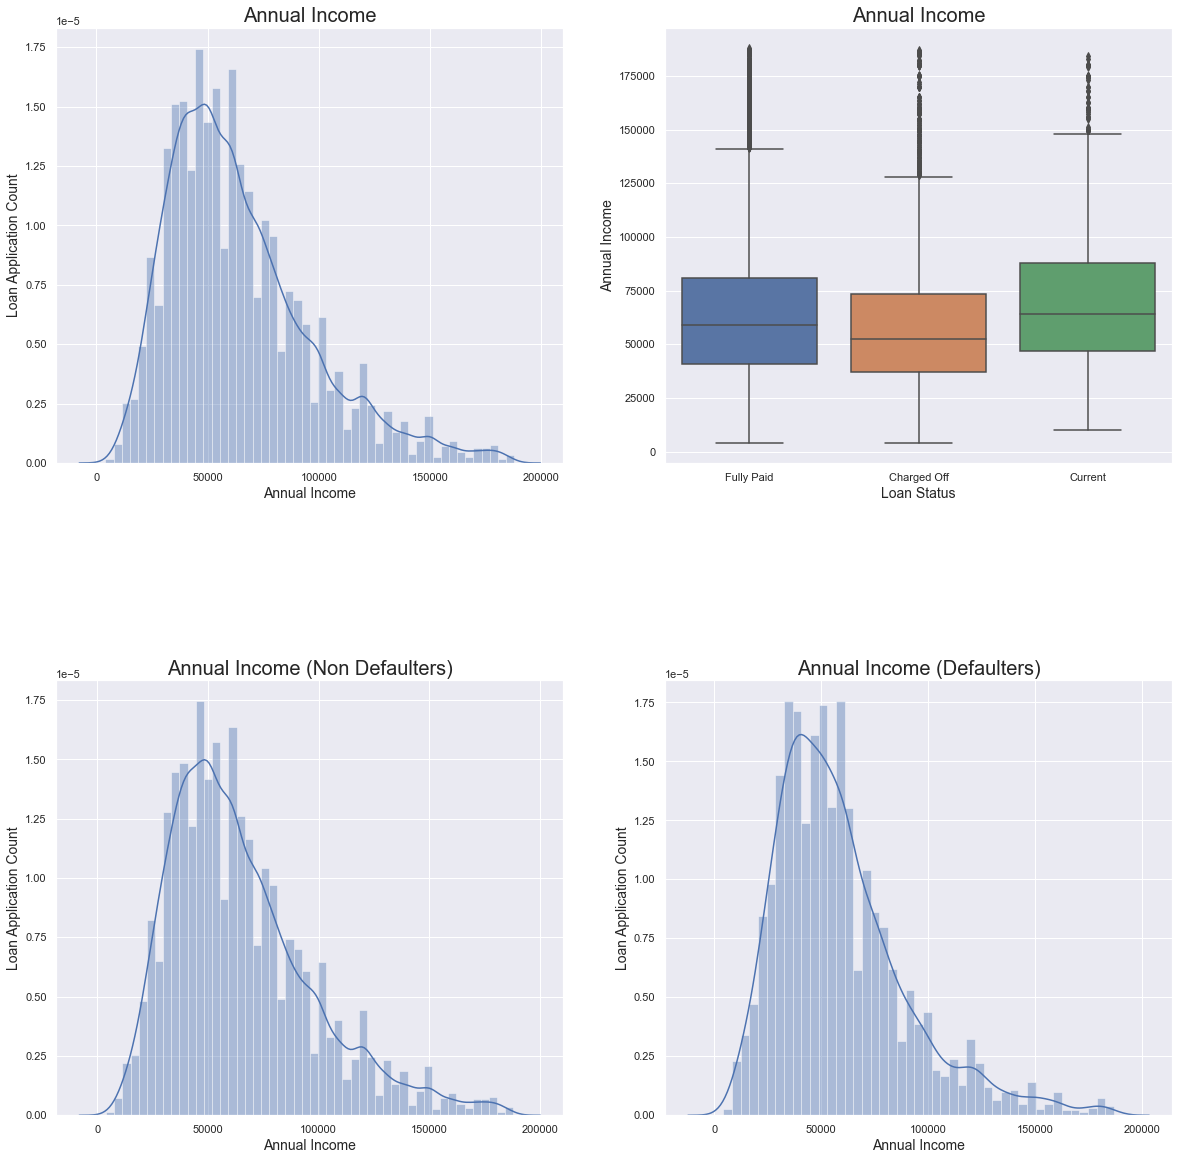

In [846]:
distplots('annual_inc', 'Annual Income', 'Annual Income')

Note:- 
Above plot shows that, most borrowers are having annual incomes between 25000 & 75000.

# Bivariate Analysis

In [847]:
def calcdefaulterpercentage(var):
    var_vs_loanstatus = new_loan_data.groupby([var, 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
    var_vs_loanstatus['Total'] = var_vs_loanstatus['Charged Off'] + var_vs_loanstatus['Current'] + var_vs_loanstatus['Fully Paid'] 
    var_vs_loanstatus['Defaulter_Percentage'] = var_vs_loanstatus['Charged Off'] / var_vs_loanstatus['Total']
    #var_vs_loanstatus.sort_values('Defaulter_Percentage', ascending=False)
    return var_vs_loanstatus

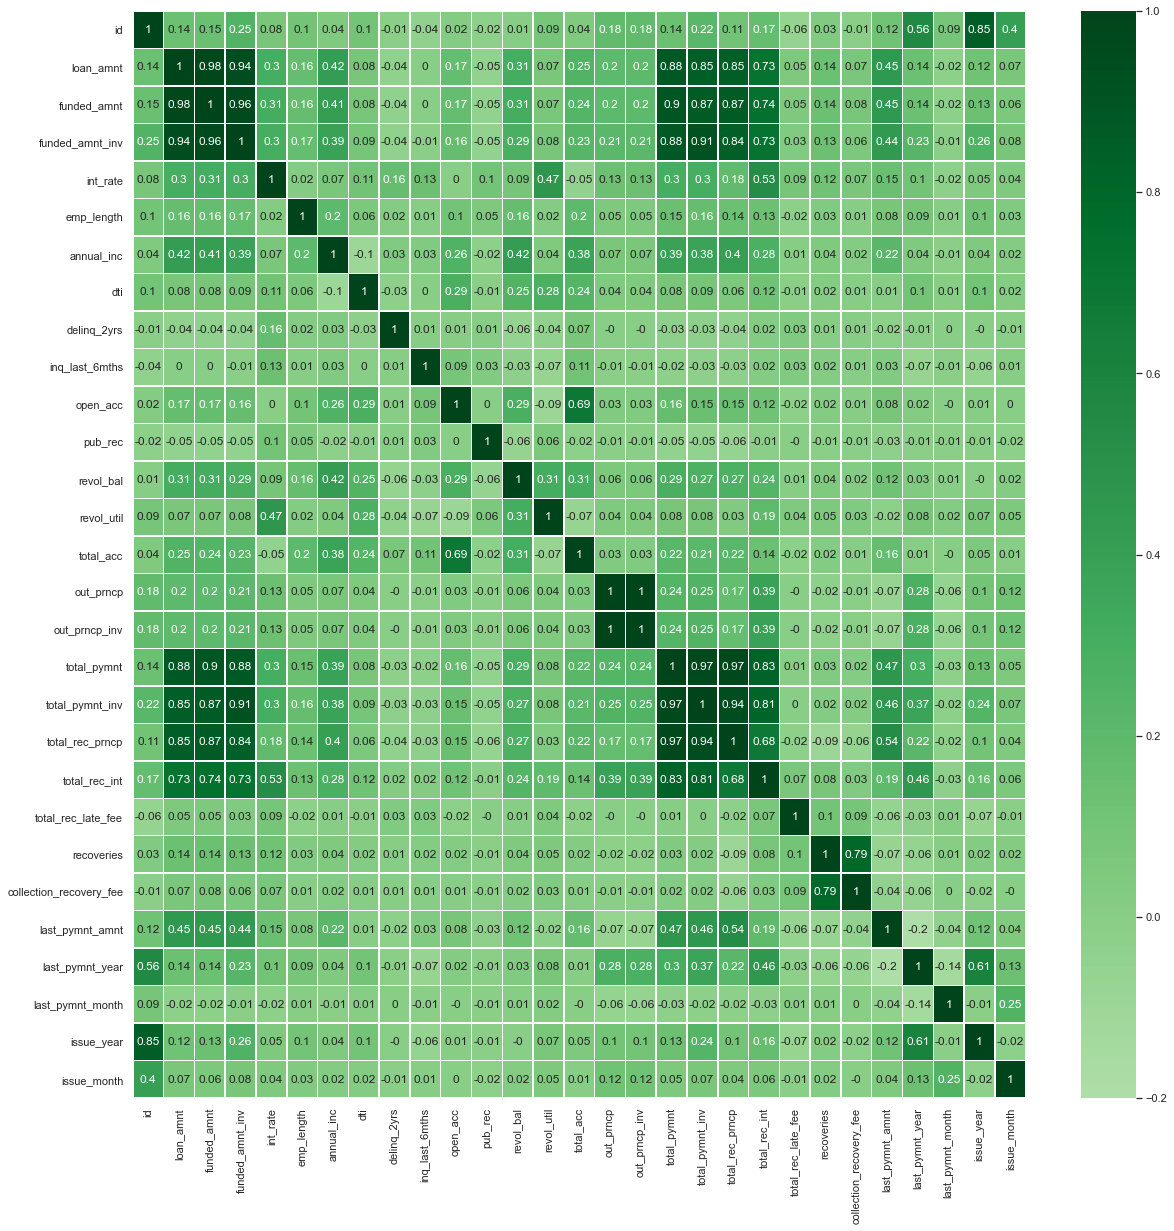

In [848]:
loan_corr = new_loan_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data=loan_corr.round(2),annot=True,cmap='Greens',linewidths=.5,center=0.1)
plt.show()

Note:-

1) dti decrease as annual income increases
2) Rate of interest increases as funded amount increases
3) Interest Rate and revolving utilization rate are directly propertional
4) Loan amount increase as funded amount increases

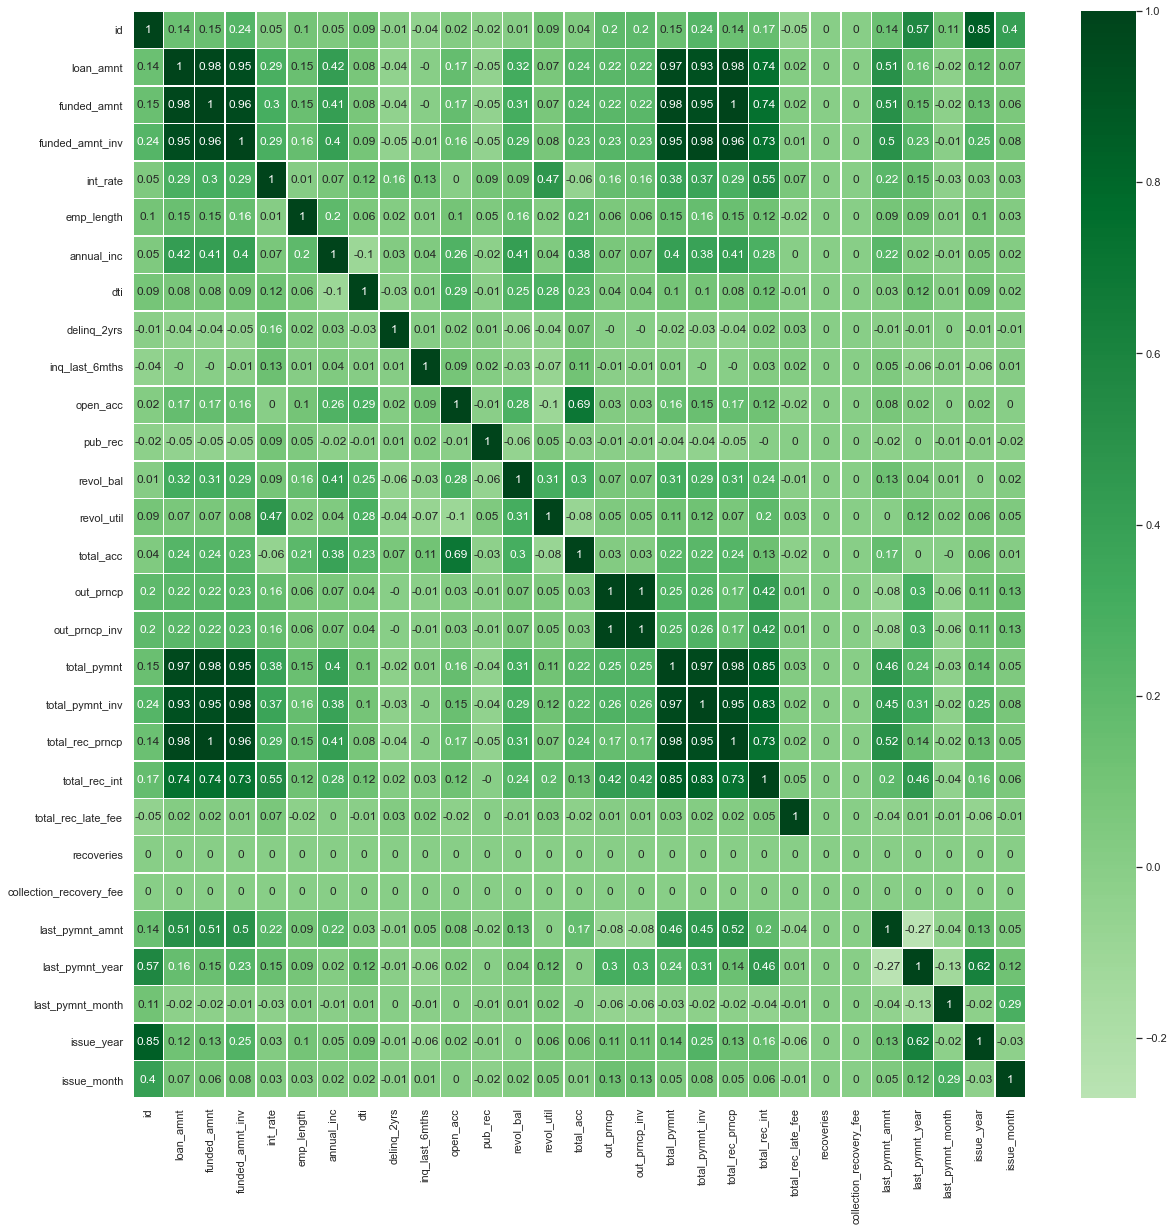

In [849]:
plt.figure(figsize=(20,20))
sns.heatmap(data=nondefaulters.corr().round(2).fillna(0),annot=True,cmap='Greens',linewidths=.5,center=0.1)
plt.show()


Note:- 
If applicant is non defaulter then columns recoveries and collection_recovery_fee are not related.

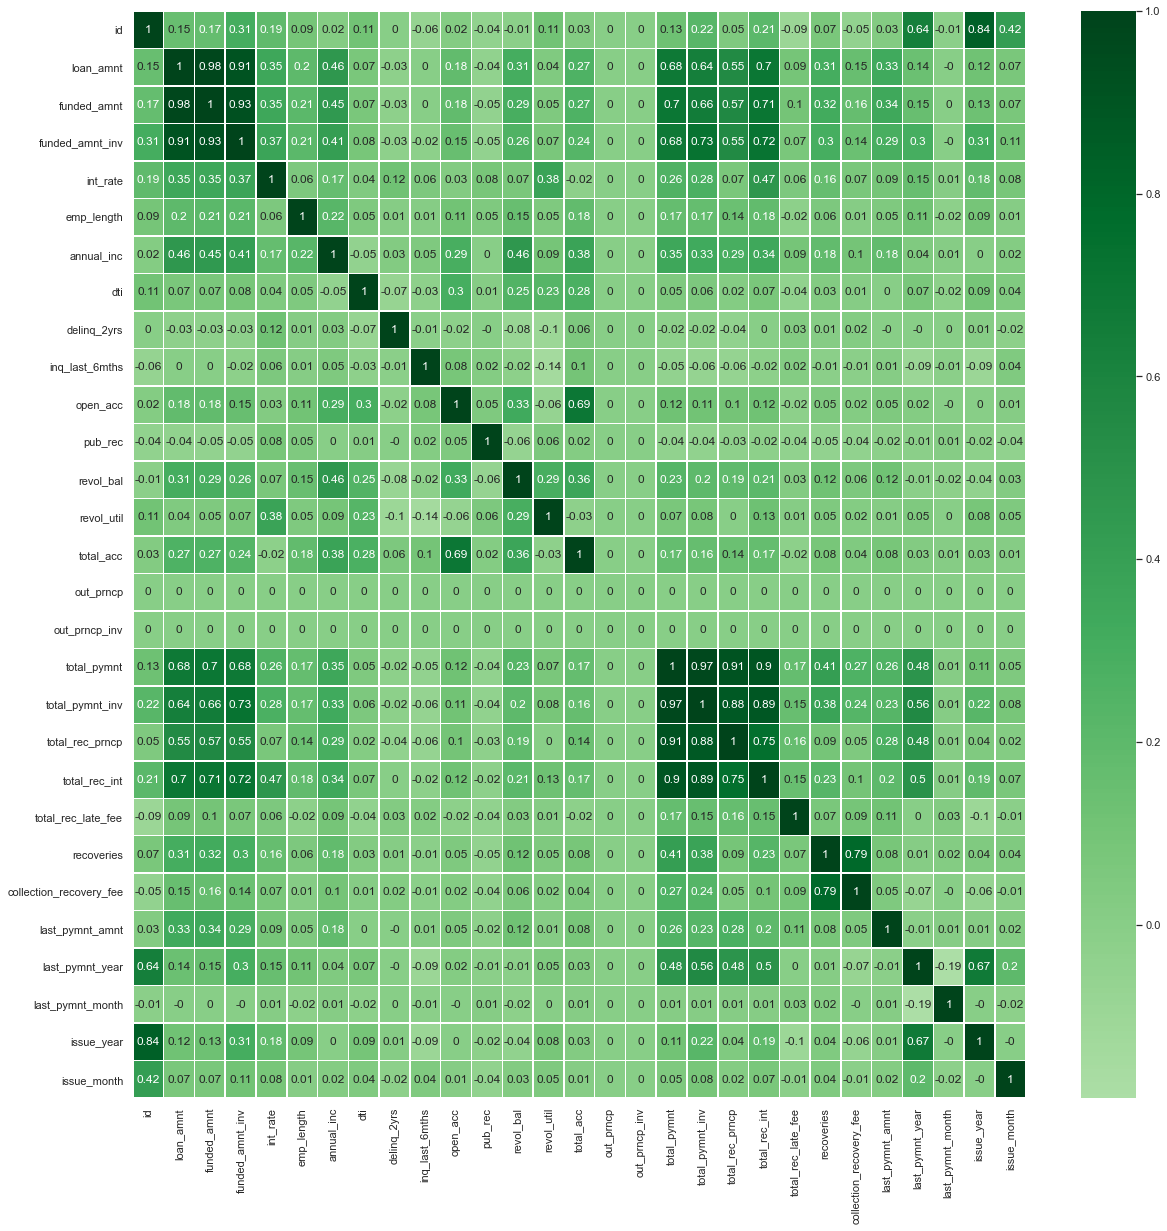

In [850]:
plt.figure(figsize=(20,20))
sns.heatmap(data=defaulter.corr().round(2).fillna(0),annot=True,cmap='Greens',linewidths=.5,center=0.1)
plt.show()


Note:- 
If applicant becomes a defaulter, there is no need for columns out_prncp and out_prncp_inv for analysis as there is no relation

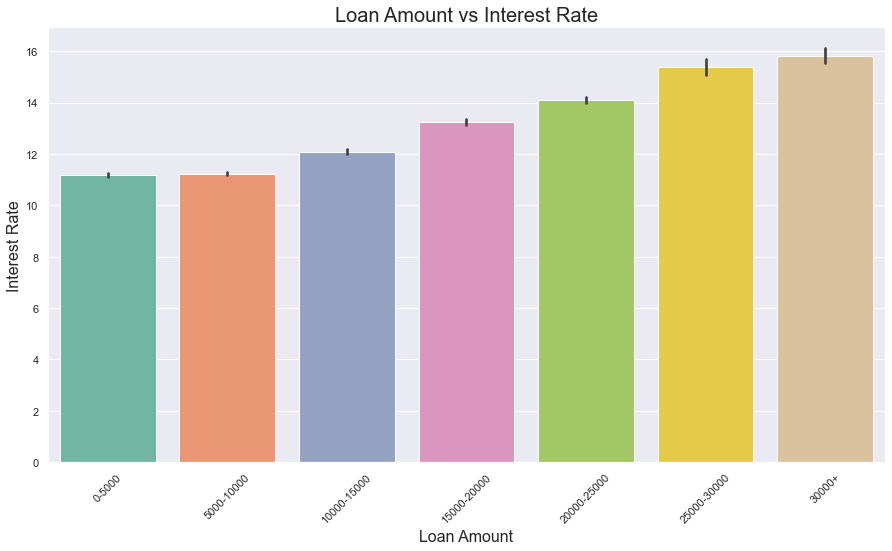

In [853]:
plt.figure(figsize=(15,8))
barplots('loan_amnt_bin', 'Loan Amount vs Interest Rate', 'Loan Amount', new_loan_data, 'int_rate', 'Interest Rate')

Note:- it can be observeed from the above graph that as loan amount increase the rate of interest also increases.

In [869]:
defaulter_purpose = calcdefaulterpercentage('purpose')
defaulter_purpose.sort_values('Defaulter_Percentage', ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Defaulter_Percentage
11,small_business,469.000,73.000,1229.000,1771.000,0.265
10,renewable_energy,18.000,1.000,79.000,98.000,0.184
3,educational,54.000,0.000,265.000,319.000,0.169
7,medical,106.000,10.000,555.000,671.000,0.158
9,other,617.000,124.000,3173.000,3914.000,0.158
8,moving,90.000,7.000,476.000,573.000,0.157
5,house,57.000,14.000,296.000,367.000,0.155
2,debt_consolidation,2743.000,577.000,15036.000,18356.000,0.149
12,vacation,53.000,6.000,319.000,378.000,0.140
4,home_improvement,335.000,95.000,2405.000,2835.000,0.118


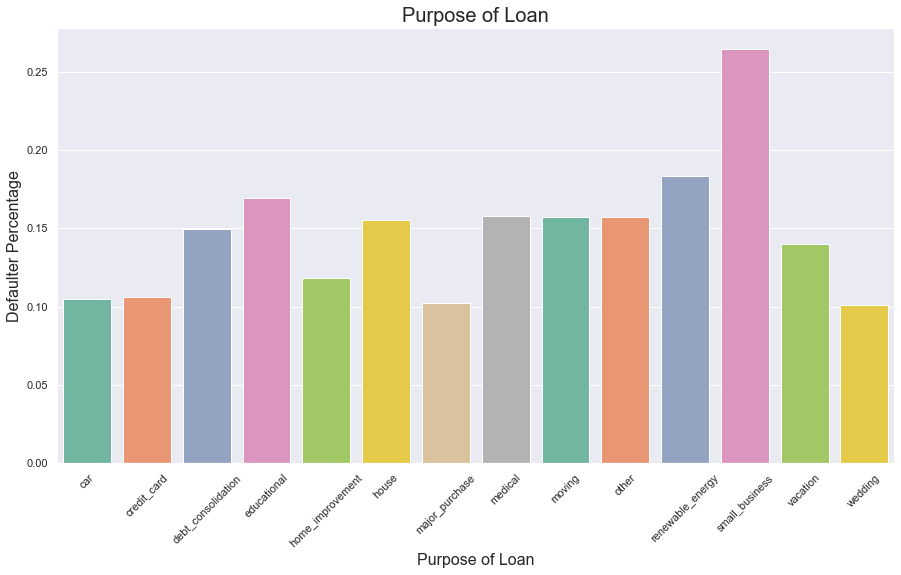

In [870]:
plt.figure(figsize=(15,8))
barplots('purpose', 'Purpose of Loan', 'Purpose of Loan', defaulter_purpose)

Note:- 
Applicant appyling loan for small business purposes have high chances of becoming a defaulter. Also people appyling loan for renewable energy have next high chance of becoming a defaulter

In [856]:
defaulter_grade = calcdefaulterpercentage('grade')
defaulter_grade.sort_values('Defaulter_Percentage', ascending=False)

loan_status,grade,Charged Off,Current,Fully Paid,Total,Defaulter_Percentage
6,G,97,16,187,300,0.323
5,F,308,69,627,1004,0.307
4,E,697,173,1882,2752,0.253
3,D,1105,216,3871,5192,0.213
2,C,1338,261,6338,7937,0.169
1,B,1404,341,10048,11793,0.119
0,A,600,40,9306,9946,0.060


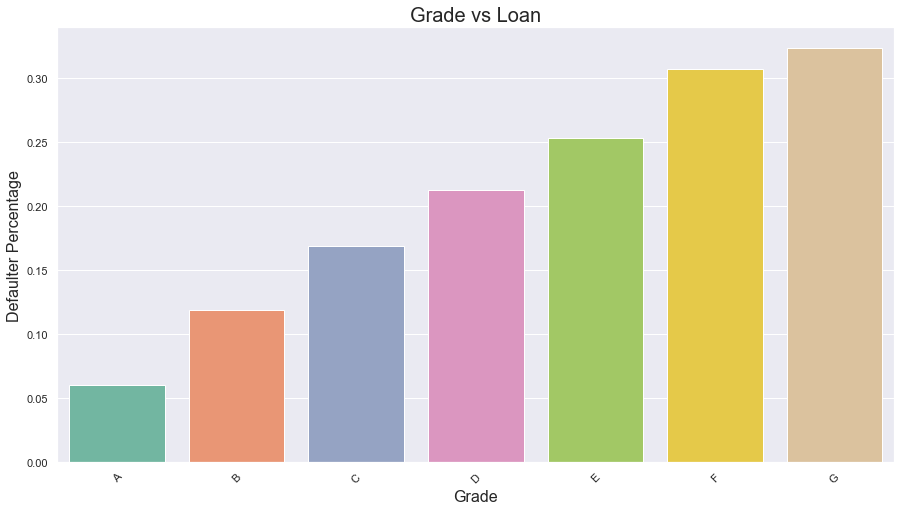

In [857]:
plt.figure(figsize=(15,8))
barplots('grade', 'Grade vs Loan', 'Grade', defaulter_grade)

Note:- As the grade of loan increases, chance of applicant becoming a defaulter also increases

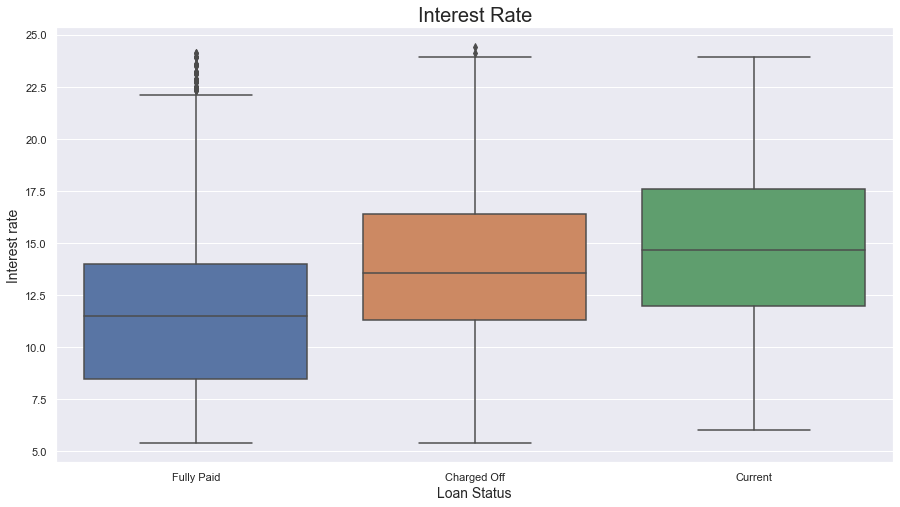

In [858]:
plt.figure(figsize=(15,8))
loanamt_status = sns.boxplot(y='int_rate', x='loan_status', data=new_loan_data)
loanamt_status.set_title('Interest Rate',fontsize=20)
loanamt_status.set_xlabel('Loan Status',fontsize=14)
loanamt_status.set_ylabel('Interest rate',fontsize=14)
plt.show()

Note:- 
Applicant having loan with high interest rate are more likely to become defaulters

In [859]:
defaulter_emplen = calcdefaulterpercentage('emp_length')
defaulter_emplen.sort_values('Defaulter_Percentage', ascending=False)

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Defaulter_Percentage
0,0,226,42,796,1064,0.212
10,10,1304,383,6935,8622,0.151
7,7,261,61,1424,1746,0.149
1,1,1085,143,6476,7704,0.141
5,5,451,87,2685,3223,0.140
8,8,200,42,1198,1440,0.139
6,6,303,57,1827,2187,0.139
3,3,549,79,3399,4027,0.136
4,4,454,93,2821,3368,0.135
2,2,560,97,3650,4307,0.130


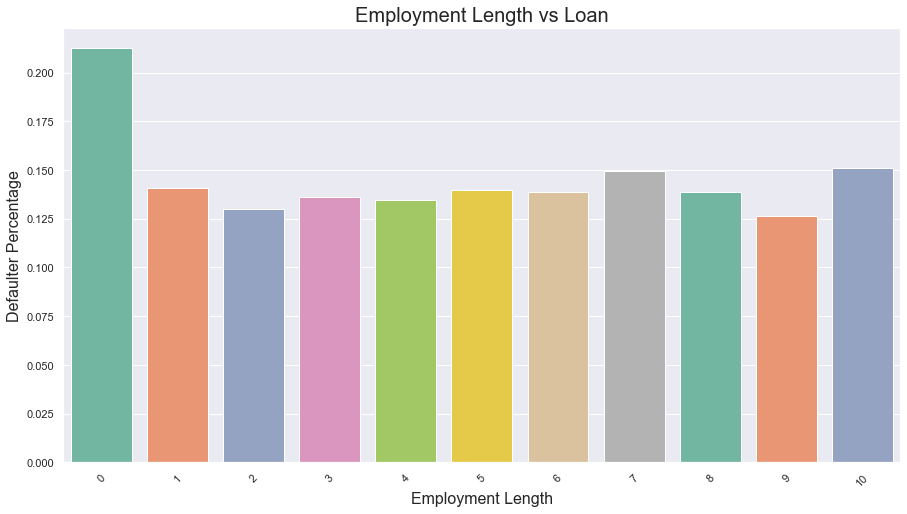

In [860]:
plt.figure(figsize=(15,8))
barplots('emp_length', 'Employment Length vs Loan', 'Employment Length', defaulter_emplen)

Note:- 
As observed from the above graph, people with no employment are more likely to become defaulters. People with 10 years of employment have next high chance of becoming a defaulters

In [871]:
defaulter_state = calcdefaulterpercentage('addr_state')
defaulter_state.sort_values('Defaulter_Percentage', ascending=False)

loan_status,addr_state,Charged Off,Current,Fully Paid,Total,Defaulter_Percentage
28,NE,3.000,0.000,2.000,5.000,0.600
32,NV,106.000,17.000,367.000,490.000,0.216
40,SD,12.000,2.000,50.000,64.000,0.188
0,AK,14.000,2.000,62.000,78.000,0.179
9,FL,496.000,85.000,2234.000,2815.000,0.176
24,MO,114.000,16.000,549.000,679.000,0.168
13,ID,1.000,0.000,5.000,6.000,0.167
31,NM,30.000,5.000,149.000,184.000,0.163
11,HI,28.000,7.000,138.000,173.000,0.162
4,CA,1108.000,149.000,5700.000,6957.000,0.159


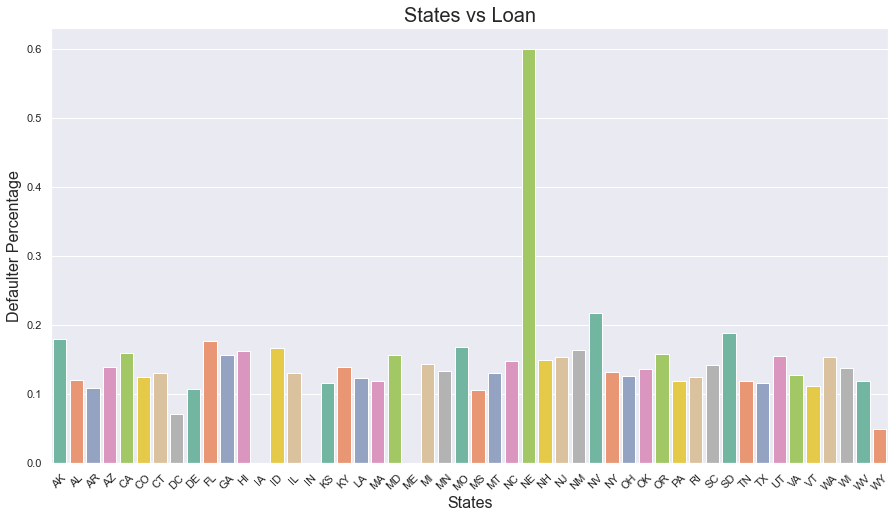

In [872]:
plt.figure(figsize=(15,8))
barplots('addr_state', 'States vs Loan', 'States', defaulter_state)

Note:- 
States NE has very high chances of charged off. NV, CA and FL states shows good number of charged offs.

In [863]:
defaulter_bankruptcies = calcdefaulterpercentage('pub_rec_bankruptcies')
defaulter_bankruptcies.sort_values('Defaulter_Percentage', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,Defaulter_Percentage
2,2.000,2.000,2.000,3.000,7.000,0.286
1,1.000,364.000,37.000,1260.000,1661.000,0.219
3,Not Known,115.000,0.000,561.000,676.000,0.170
0,0.000,5068.000,1077.000,30435.000,36580.000,0.139


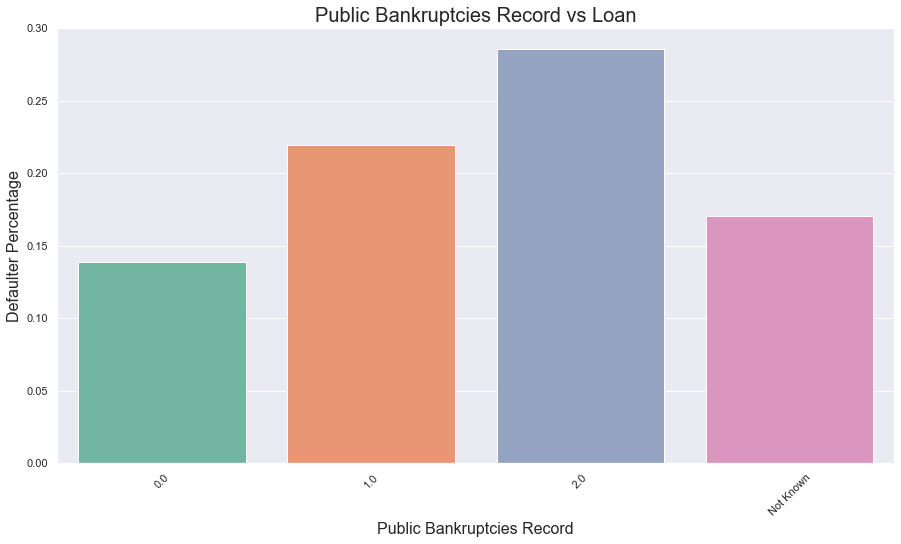

In [864]:
plt.figure(figsize=(15,8))
barplots('pub_rec_bankruptcies', 'Public Bankruptcies Record vs Loan', 'Public Bankruptcies Record', defaulter_bankruptcies)

Note:- 
People with pub_rec_bankruptcies count 1 have higher chance of defaulting then count 0, and people with count 2 has even higher chance of defaulting then count 1.
<br/><br/>
Conclusion:- People who have defaulted before have higher chance of defaulting again

In [865]:
#Here also we need to bin for plotting proper bar plot. it will be done in data cleaning and manipulation step
defaulter_annualinc = calcdefaulterpercentage('annual_inc_bin')
defaulter_annualinc.sort_values('Defaulter_Percentage', ascending=False)

loan_status,annual_inc_bin,Charged Off,Current,Fully Paid,Total,Defaulter_Percentage
0,0-20000,237,9,943,1189,0.199
1,20000-40000,1514,170,7004,8688,0.174
2,40000-60000,1729,345,9534,11608,0.149
3,60000-80000,1024,240,6597,7861,0.130
4,80000 +,531,170,3983,4684,0.113


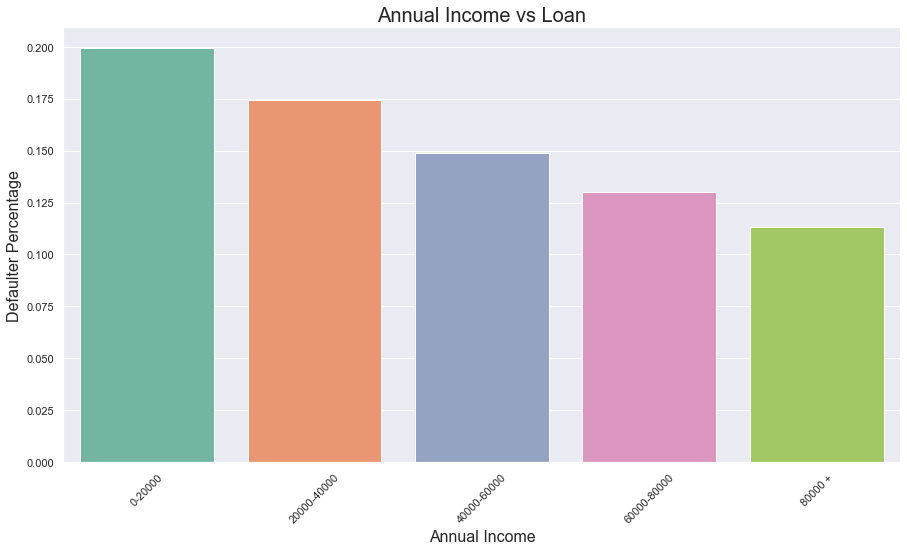

In [866]:
plt.figure(figsize=(15,8))
barplots('annual_inc_bin', 'Annual Income vs Loan', 'Annual Income', defaulter_annualinc)

Note:- 
Income range 80000+  has less chances of charged off.
Income range 0-20000 has high chances of charged off.
People with low annual income are more likely to default than people having high annual income 
